<a href="https://colab.research.google.com/github/damerei/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [15]:
# TODO

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

patients_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

col_names = ["Age", "Year of Operation", "Positive Axillary Nodes", "Survival Status"]

patients = pd.read_csv(patients_url)

patients.columns = col_names #Column names

patients.isnull().any()  #No NaN values

print(patients.head(306)) #306 instances, per UCI dataset, 305 rows




     Age  Year of Operation  Positive Axillary Nodes  Survival Status
0     30                 62                        3                1
1     30                 65                        0                1
2     31                 59                        2                1
3     31                 65                        4                1
4     33                 58                       10                1
5     33                 60                        0                1
6     34                 59                        0                2
7     34                 66                        9                2
8     34                 58                       30                1
9     34                 60                        1                1
10    34                 61                       10                1
11    34                 67                        7                1
12    34                 60                        0                1
13    35            

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Year of Operation,"(57.989, 59.375]","(59.375, 60.75]","(60.75, 62.125]","(62.125, 63.5]","(63.5, 64.875]","(64.875, 66.25]","(66.25, 67.625]","(67.625, 69.0]"
Survival Status,,,,,,,,
1,0.666667,0.857143,0.795918,0.733333,0.733333,0.660714,0.84,0.708333
2,0.333333,0.142857,0.204082,0.266667,0.266667,0.339286,0.16,0.291667


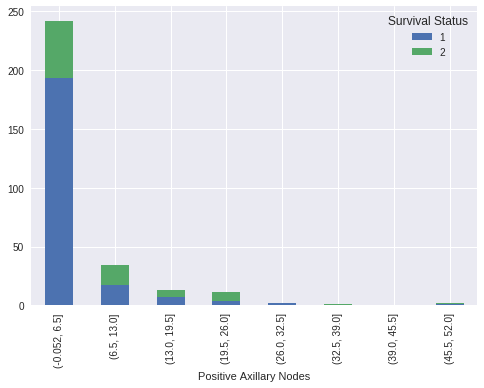

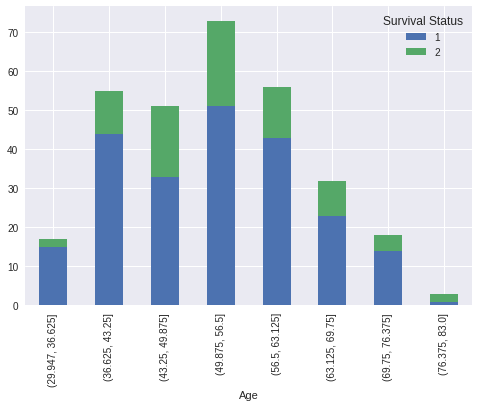

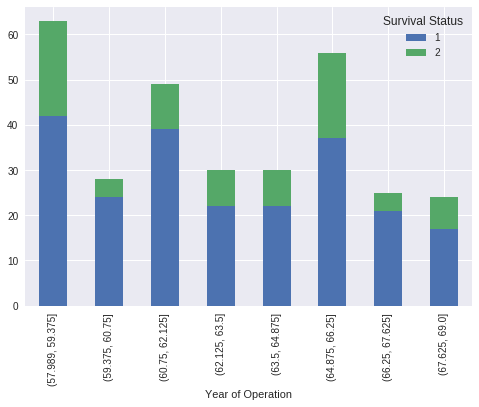

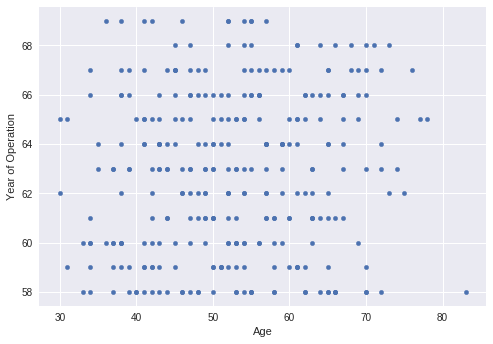

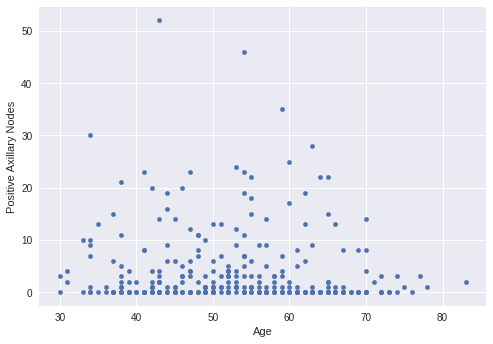

In [56]:
# TODO

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

patients_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

col_names = ["Age", "Year of Operation", "Positive Axillary Nodes", "Survival Status"]

patients = pd.read_csv(patients_url)

patients.columns = col_names #Column names

patients.isnull().any()  #No NaN values


age_bins = pd.cut(patients['Age'], 8)

year_bins = pd.cut(patients['Year of Operation'], 8)

axillary_bins = pd.cut(patients['Positive Axillary Nodes'], 8)

ct_age = pd.crosstab(age_bins, patients['Survival Status'])

pd.crosstab(patients['Survival Status'], age_bins, normalize='columns')

#pd.crosstab(patients['Survival Status'], age_bins).plot.bar(stacked=True)

pd.crosstab(patients['Survival Status'], axillary_bins, normalize='columns')


pd.crosstab(axillary_bins, patients['Survival Status']).plot.bar(stacked=True)

pd.crosstab(age_bins, patients['Survival Status']).plot.bar(stacked=True)

pd.crosstab(year_bins, patients['Survival Status']).plot.bar(stacked=True)

patients.plot.scatter(x='Age', y='Year of Operation')

patients.plot.scatter(x='Age', y='Positive Axillary Nodes')

pd.crosstab(patients['Survival Status'], year_bins, normalize='columns')



#pd.crosstab(year_bins, patients['Survival Status']).plot.bar(stacked=True)

#ct_age.plot.bar(stacked=True)




## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

Year of Operation looks to have a positive correlation with survival. 

- What is at least one feature that looks to have a negative relationship with survival?

Both the number of axillary nodes and the age of the patient appear to have a negative relationship with survival.

- How are those two features related with each other, and what might that mean?

Year of operation does not seem to have strong positive or negative relatinships with age or the number of axillary nodes. Neither does age seem to have much
correlation with the number of axillary nodes. 

It suggests that in fact the number of axillary nodes, the year of operation, and the age of the patient, are all relatively orthogonal predictors, and a good model should ideally make use of all three. Perhaps something like a principal component analysis would give the relative weightings effectively.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.